# Linear Regression

<a id='content'></a>
### Contents

- [Demo 1 -- Predicting Life Expectancy](#demo1)
- [Demo 2 -- Multiple Linear Regression -- Predict Boston Price](#demo2)
- [Demo 3 -- Polynomial Regression](#demo3)
- [Mini_demo -- Make a Pipeline](#pipeline)
- [Demo 4 -- Regularization (L1 Regurization)](#demo4)

<a id='demo1'></a>
## Demo 1: Predicting Life Expectancy

In [1]:
import os
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir('projects_on_GitHub/Machine_learning/Linear_Regression')

In [5]:
bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv')
bmi_life_data

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083
...,...,...,...
158,Vanuatu,63.4,26.78926
159,West Bank and Gaza,74.1,26.57750
160,Vietnam,74.1,20.91630
161,Zambia,51.1,20.68321


In [18]:
X_bmi = bmi_life_data.BMI
type(X_bmi)

pandas.core.series.Series

In [19]:
type(bmi_life_data[['BMI']])

pandas.core.frame.DataFrame

In [11]:
y_life = bmi_life_data.loc[:, 'Life expectancy']
y_life

0      52.8
1      76.8
2      75.5
3      84.6
4      56.7
       ... 
158    63.4
159    74.1
160    74.1
161    51.1
162    47.3
Name: Life expectancy, Length: 163, dtype: float64

In [20]:
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

LinearRegression()

In [21]:
laos_life_exp = bmi_life_model.predict([[21.07931]])

In [22]:
laos_life_exp

array([[60.31564716]])

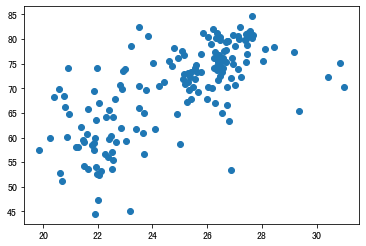

In [23]:
plt.scatter(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']]);

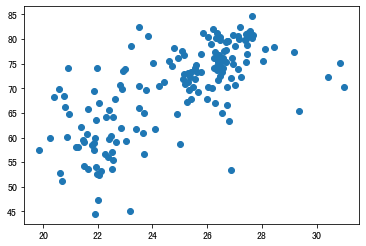

In [25]:
plt.scatter(bmi_life_data.BMI, bmi_life_data.loc[:, 'Life expectancy']);

In [43]:
w = bmi_life_model.coef_[0]

In [44]:
b = bmi_life_model.intercept_

In [45]:
X = np.arange(bmi_life_data.BMI.min(), bmi_life_data.BMI.max())
y = w*X + b


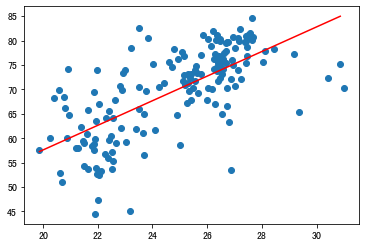

In [50]:
plt.scatter(bmi_life_data.BMI, bmi_life_data.loc[:, 'Life expectancy'], zorder=1);
plt.plot(X, y, zorder=2, color='red');

[Back to Contents](#content)

<a id='demo2'></a>
## Demo 2: Multiple Linear Regression -- Predict Boston Price

This demo will be using **[Boston house-prices dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)**. The dataset consists of 13 features of 506 houses and the median home value in $1000's. You'll fit a model on the 13 features to predict the value of the houses.

### Regression Steps

**Step 1: Build a linear regression model**  
- Create a regression model using scikit-learn's `LinearRegression` and assign it to `model`.
- Fit the model to the data.

**Step 2: Predict using the model**  
- Predict the value of `sample_house`.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [70]:
boston_data = load_boston()
type(boston_data)

sklearn.utils.Bunch

In [71]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [69]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [58]:
# explore the dataset
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [59]:
# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data.data
y = boston_data.target

# Make and fit the linear regression model
# TODO: Fit the model and Assign it to the model variable
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)

In [60]:
prediction

array([23.68284712])

In [67]:
model.coef_, model.intercept_

(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]),
 36.459488385089855)

[Back to Contents](#content)

<a id='demo3'></a>
## Demo 3: Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = pd.read_csv('polynomial.csv')
data.head()

,Var_X,Var_Y
0,-0.33532,6.66854
1,0.02160,3.86398
2,-1.19438,5.16161
3,-0.65046,8.43823
4,-0.28001,5.57201


In [14]:
# X = data.Var_X.values.reshape(-1,1)
# y = data.Var_Y.values.reshape(-1,1)

# another way to extract the predictor variable is:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# X = data[['Var_X']]
# y = data[['Var_Y']]

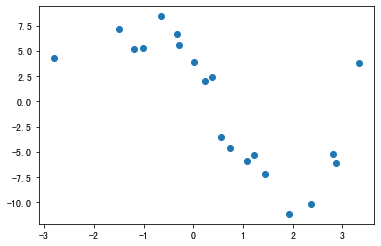

In [15]:
# Look at the trends in the data
plt.scatter(X, y);

We can see from the scatter plot above that these points don't eally follow a simple line pattern, so consider to regress them in polynomial.

In [16]:
poly_feat = PolynomialFeatures(degree=4)
X_poly = poly_feat.fit_transform(X) # x**0, x**1, x**2, x**3, x**4 accordingly

In [17]:
X_poly[:5]

array([[ 1.00000000e+00, -3.35320000e-01,  1.12439502e-01,
        -3.77032139e-02,  1.26426417e-02],
       [ 1.00000000e+00,  2.16000000e-02,  4.66560000e-04,
         1.00776960e-05,  2.17678234e-07],
       [ 1.00000000e+00, -1.19438000e+00,  1.42654358e+00,
        -1.70383513e+00,  2.03502660e+00],
       [ 1.00000000e+00, -6.50460000e-01,  4.23098212e-01,
        -2.75208463e-01,  1.79012097e-01],
       [ 1.00000000e+00, -2.80010000e-01,  7.84056001e-02,
        -2.19543521e-02,  6.14743813e-03]])

In [18]:
y[:5]

0    6.66854
1    3.86398
2    5.16161
3    8.43823
4    5.57201
Name: Var_Y, dtype: float64

In [19]:
poly_model = LinearRegression(fit_intercept=False)
poly_model.fit(X_poly, y);

In [20]:
x_seq = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
x_seq_poly = poly_feat.fit_transform(x_seq)
y_pred = poly_model.predict(x_seq_poly)

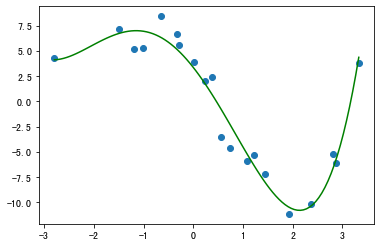

In [21]:
plt.scatter(X, y)
plt.plot(x_seq, y_pred, color='green');

In [29]:
# Wrap the procedure above into a funciton
def poly_viz(X, y, degree):
    
    # transform the x variable to its polynomials
    poly_feat = PolynomialFeatures(degree=degree)
    X_poly = poly_feat.fit_transform(X)
    
    # initialze the linear regressor
    poly_model = LinearRegression(fit_intercept=False)
    
    # fit the data
    poly_model.fit(X_poly, y)
    
    # construct a series of data points to project to the model
    x_seq = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    x_seq_poly = poly_feat.fit_transform(x_seq)
    y_preds = poly_model.predict(x_seq_poly)
    
    # visualize the original data set
    plt.scatter(X, y)
    
    # plot the regression line
    plt.plot(x_seq, y_preds, color='red');

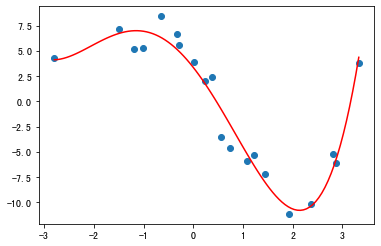

In [30]:
# when degree=4
poly_viz(X, y, 4)

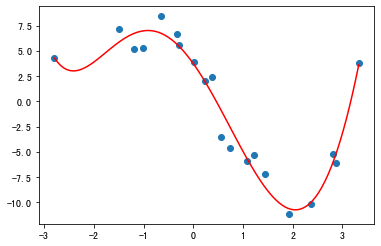

In [31]:
# when degree=5
poly_viz(X, y, 5)

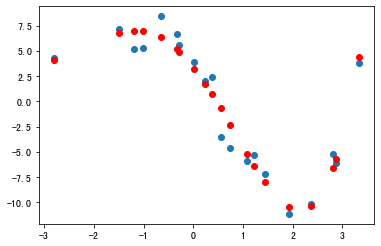

In [35]:
y_preds1 = poly_model.predict(X_poly)
# visualize the original data set
plt.scatter(X, y)

# plot the regression line
plt.scatter(X, y_preds1, color='red');

<a id='pipeline'></a>
### Mini_demo - Make a pipeline

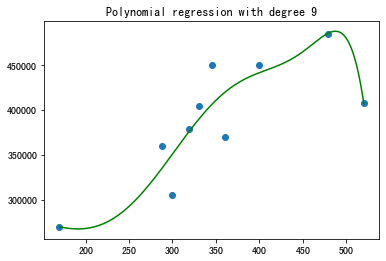

In [176]:
xdic={'X': {11: 300, 12: 170, 13: 288, 14: 360, 15: 319, 16: 330, 17: 520, 18: 345, 19: 399, 20: 479}}
ydic={'y': {11: 305000, 12: 270000, 13: 360000, 14: 370000, 15: 379000, 16: 405000, 17: 407500, 18: 450000, 19: 450000, 20: 485000}}
X=pd.DataFrame.from_dict(xdic)
y=pd.DataFrame.from_dict(ydic)
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
from sklearn.pipeline import make_pipeline
degree=9
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="green")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

[Back to Contents](#content)

<a id='demo4'></a>
## Demo 4: Regularization

- Lasso Regularization (L1 -- Absolute Method)
- Ridge Regularization (L2 -- Squared Method)

**Use L1 regularization to build the model**

In [210]:
from sklearn.linear_model import Lasso

In [206]:
train_data = pd.read_csv('lasso_exercise.csv', header=None)
train_data.head()

,0,1,2,3,4,5,6
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122


In [208]:
X = train_data.values[:, :-1]
X[:5]

array([[ 1.256640e+00,  2.049780e+00, -6.236400e+00,  4.719260e+00,
        -4.269310e+00,  2.059000e-01],
       [-3.890120e+00, -3.751100e-01,  6.149790e+00,  4.945850e+00,
        -3.578440e+00,  6.400000e-03],
       [ 5.097840e+00,  9.812000e-01, -2.993900e-01,  5.858050e+00,
         2.829700e-01, -2.062600e-01],
       [ 3.903400e-01, -3.068610e+00, -5.634880e+00,  6.439410e+00,
         3.925600e-01, -7.084000e-02],
       [ 5.847270e+00, -1.592200e-01,  1.141246e+01,  7.521650e+00,
         1.698860e+00,  2.902200e-01]])

In [209]:
y = train_data.values[:, -1]
y[:5]

array([ 12.31798,  23.67628,  -1.53459, -24.6867 ,  17.54122])

In [211]:
lasso_reg = Lasso()
lasso_reg.fit(X, y)
print(lasso_reg.coef_)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]


**We can see from above that the weights of first and last feature variable are converged to 0**.

## Demo 5: Feature Scaling Method

**1. Standardizing Method**  
$
\begin{align}
val\_standardized = \frac{x_i - \bar{x}}{std(X)}
\end{align}
$


**2. Normalizing Method**  

$
\begin{align}
val\_normalized = \frac{x_i - x_{min}}{x_{max} - x_{min}}
\end{align}
$

For this demo, use the same data as in L1 regularization part above

In [214]:
from sklearn.preprocessing import StandardScaler

In [212]:
train_data = pd.read_csv('lasso_exercise.csv', header=None)
train_data

,0,1,2,3,4,5,6
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122
...,...,...,...,...,...,...,...
95,-4.58240,-1.27825,7.55098,8.83930,-3.80318,0.04386,26.14768
96,-10.00364,2.66002,-4.26776,-3.73792,-0.72349,-0.24617,0.76214
97,-4.32624,-2.30314,-8.16044,4.46366,-3.33569,-0.01655,-10.05262
98,-1.90167,-0.15858,-10.43466,4.89762,-0.64606,-0.14519,-19.63970


In [215]:
X = train_data.values[:, :-1]
y = train_data.values[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso_reg = Lasso()
lasso_reg.fit(X_scaled, y)

print(lasso_reg.coef_)

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]


**Compared with Regularization part, which is before feature scaling, we can see from above that the weights of first and fourth feature variable are converged to 0**.